In [41]:
import tensorflow as tf

In [42]:
mnist = tf.keras.datasets.mnist

After loading divide into train and test dataset

In [43]:
## unpacking the dataset into tain and test dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()


In [44]:
x_train.shape

(60000, 28, 28)

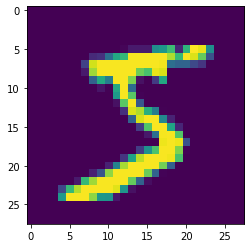

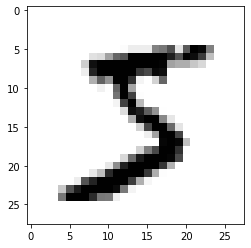

In [27]:
##just check the graph, how data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show() ## in order to execute the graph
## however we dont know whether its color image or binary images
## in order to plot it change the configuration
plt.imshow(x_train[0], cmap = plt.cm.binary)

 Checking value of each pixel
 Before Normalization

In [28]:
print (x_train[0]) ### before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

As images are in Gray level(1 channel ==> 0 to 255), not Colored (RGB)
NOrmalizing the data | Pre- processing Step

## As images are in Gray level(1 channel==> 0 to 255), not colored(RGB)

##Normalizing the data | Pre-Processing Step

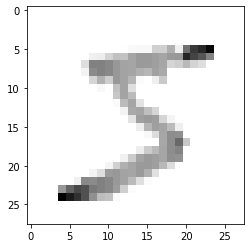

In [32]:
### you have noticed that, is gray image all values varies from 0 to 255
### in order to normalize it X_train/255
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis= 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

## After normailzation

In [33]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [34]:
print(y_train[0])

5


# Resizing image to make it suitable for apply convolution operation

In [37]:
import numpy as np
IMG_SIZE=28
x_trainr= np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr= np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE,1)
print("Training samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)


Training samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


##Creating a deep neural network
### Training a 60000 samples of MNIST handwritten dataset

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [45]:
### CReating a neural network now
model = Sequential()

#### First Convolution Layer 0 1 2 3 (60000,28,28,1) 28-3+1= 26*26
model.add(Conv2D(64,(3,3), input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#### 2nd Convolution Layer 
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#### 3rd Convolution layer 
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Fully Connected Layer #1
model.add (Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#### Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

##Last Fully Connected layer, output must be equal to number of classes, 10(0 to 9)
model.add(Dense(10))
model.add(Activation('softmax'))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)         

In [47]:
print("Total Taining Samples =",len(x_trainr))


Total Taining Samples = 60000


In [54]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [56]:
model.fit(x_trainr, y_train,epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 60s 45ms/step - loss: 0.3227 - accuracy: 0.9017 - val_loss: 0.1628 - val_accuracy: 0.9522
Epoch 2/5
1313/1313 [==============================] - 55s 42ms/step - loss: 0.1054 - accuracy: 0.9682 - val_loss: 0.0948 - val_accuracy: 0.9721
Epoch 3/5
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0762 - accuracy: 0.9765 - val_loss: 0.0654 - val_accuracy: 0.9809
Epoch 4/5
1313/1313 [==============================] - 54s 41ms/step - loss: 0.0597 - accuracy: 0.9813 - val_loss: 0.0664 - val_accuracy: 0.9794
Epoch 5/5
1313/1313 [==============================] - 52s 39ms/step - loss: 0.0485 - accuracy: 0.9842 - val_loss: 0.0670 - val_accuracy: 0.9788


In [58]:
### Evaluationg on testing data set MNIST
test_loss, test_acc = model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Validation accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0648 - accuracy: 0.9809
Test loss on 10,000 test samples 0.0648064836859703
Validation accuracy on 10,000 test samples 0.98089998960495


In [60]:
predicions = model.predict([x_testr])

In [61]:
print (predictions)

[[7.8549451e-09 1.0889435e-06 2.4859705e-07 ... 9.9997151e-01
  1.4078569e-06 2.1986494e-05]
 [1.1772618e-03 8.7072731e-05 9.9845195e-01 ... 4.7635269e-05
  8.7887820e-05 2.7421551e-05]
 [1.4345541e-05 9.9995661e-01 7.6257716e-06 ... 2.2452914e-06
  2.8153995e-06 4.1776457e-06]
 ...
 [6.2072575e-10 6.4984725e-08 7.0124528e-08 ... 1.6081390e-07
  7.9043166e-06 7.2676755e-07]
 [1.9835511e-06 2.4711703e-11 1.6762701e-11 ... 3.3377905e-11
  1.7588352e-05 1.0774392e-07]
 [3.7606087e-04 6.7929744e-07 2.4809781e-06 ... 6.9380137e-09
  7.7329794e-05 1.5734222e-05]]


In [62]:
print(np.argmax(predicions[0]))

7


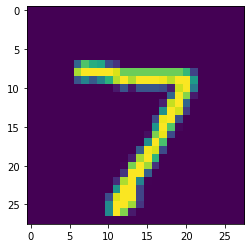

In [63]:
plt.imshow(x_test[0])

In [64]:
print(np.argmax(predicions[125]))

9


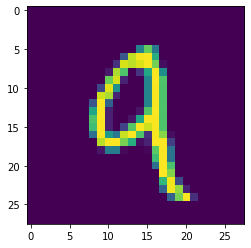

In [65]:
plt.imshow(x_test[125])

In [67]:
import cv2

In [91]:
img = cv2.imread("image.png")

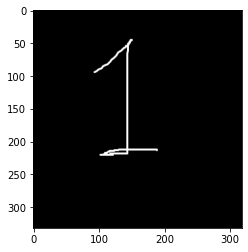

In [92]:
plt.imshow(img)

In [93]:
img.shape

(332, 318, 3)

In [94]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [95]:
gray.shape

(332, 318)

In [96]:
resized = cv2.cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [97]:
resized.shape

(28, 28)

In [98]:
newimg = tf.keras.utils.normalize(resized, axis = 1)

In [99]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [100]:
newimg.shape

(1, 28, 28, 1)

In [101]:
predicions = model.predict(newimg)

In [102]:
print (np.argmax(predicions))

1
